In [475]:
import pandas as pd

In [476]:
data = pd.read_csv('DHT_sensor_data_updated.csv')

Data Analysis

In [477]:
data.head()

,Date,Time,Temperature,Humidity
0,20/02/2025,22:30:51,43,28.2
1,20/02/2025,22:31:00,45,30.9
2,20/02/2025,22:31:06,43,25.3
3,20/02/2025,22:31:20,42,34.0
4,20/02/2025,22:31:26,41,26.3


In [478]:
data.tail()

,Date,Time,Temperature,Humidity
995,21/02/2025,01:17:33,41,30.3
996,21/02/2025,01:17:47,47,29.6
997,21/02/2025,01:17:59,43,32.1
998,21/02/2025,01:18:10,43,33.0
999,21/02/2025,01:18:20,40,29.6


In [479]:
data.shape

(1000, 4)

In [480]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1000
Number of Columns 4


In [481]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1000 non-null   object 
 1   Time         1000 non-null   object 
 2   Temperature  1000 non-null   int64  
 3   Humidity     1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


Checking for null values

In [482]:
data.isnull().sum()

Date           0
Time           0
Temperature    0
Humidity       0
dtype: int64

In [483]:
data.describe()

,Temperature,Humidity
count,1000.000000,1000.000000
mean,44.986000,29.964800
std,3.146698,2.871422
min,40.000000,25.000000
25%,42.000000,27.500000
50%,45.000000,30.000000
75%,48.000000,32.400000
max,50.000000,35.000000


In [484]:
data.head()

,Date,Time,Temperature,Humidity
0,20/02/2025,22:30:51,43,28.2
1,20/02/2025,22:31:00,45,30.9
2,20/02/2025,22:31:06,43,25.3
3,20/02/2025,22:31:20,42,34.0
4,20/02/2025,22:31:26,41,26.3


Data Manupilation

In [485]:
def assess_spoilage(temp, humidity):
    spoilage_risk = False  # Flag to track if there's any spoilage risk
    
    # Temperature-based spoilage risk
    if temp > 40:
        print("Spoilage Risk: YES")
        print("Rapid Spoilage due to ideal conditions for mold and bacterial growth")
        spoilage_risk = True
    elif 15 <= temp <= 40:
        print("Spoilage Risk: NO")
        print("Optimum condition due to reduced microbial and insect activity")
    else:
        print("Spoilage Risk: NO")
        print("Reduced spoilage rate due to slow biological and chemical reactions")
    
    # Humidity-based spoilage risk
    if humidity > 60:
        print("Spoilage Risk: YES")
        print("Rapid spoilage because it creates an ideal environment for mold and fungi growth")
        spoilage_risk = True
    elif 40 <= humidity <= 60:
        print("Spoilage Risk: NO")
        print("Optimum condition due to balanced moisture retention and drying")
    elif humidity < 40:
        print("Spoilage Risk: NO")
        print("Slow spoilage rate  because it inhibits mold and bacteria activity")

    # Final Spoilage Risk Alert
    if spoilage_risk:
        print("⚠️ SPOILAGE RISK ALERT! ⚠️")
    else:
        print("✅ NO SPOILAGE RISK ✅")


In [486]:
# **Testing the function with specific values**
assess_spoilage(78, 65)  # Example: Temperature = 78°C, Humidity = 65%

Spoilage Risk: YES
Rapid Spoilage due to ideal conditions for mold and bacterial growth
Spoilage Risk: YES
Rapid spoilage because it creates an ideal environment for mold and fungi growth
⚠️ SPOILAGE RISK ALERT! ⚠️


Data Visualization

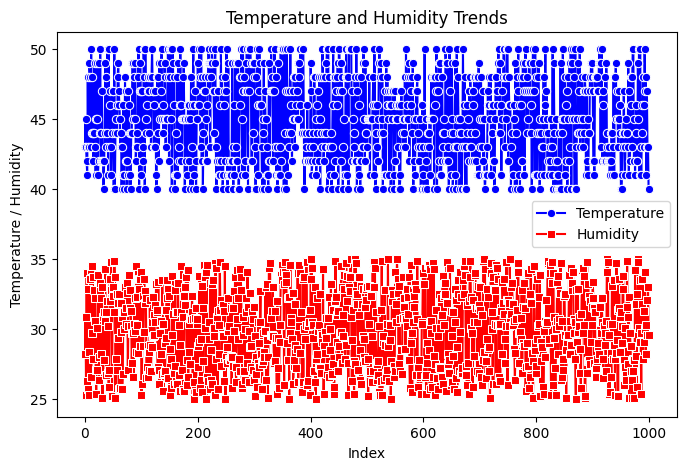

In [487]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot with Temperature and Humidity
plt.figure(figsize=(8, 5))
sns.lineplot(data=data, x=data.index, y="Temperature", label="Temperature", marker="o", color="blue")
sns.lineplot(data=data, x=data.index, y="Humidity", label="Humidity", marker="s", color="red")

# Labels & Title
plt.xlabel("Index")
plt.ylabel("Temperature / Humidity")
plt.title("Temperature and Humidity Trends")
plt.legend()
plt.show()


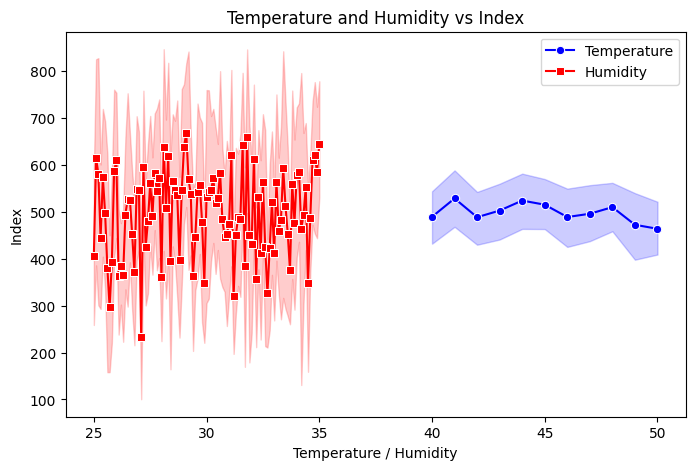

In [488]:
# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=data["Temperature"], y=data.index, label="Temperature", marker="o", color="blue")
sns.lineplot(x=data["Humidity"], y=data.index, label="Humidity", marker="s", color="red")

# Labels & Title
plt.xlabel("Temperature / Humidity")
plt.ylabel("Index")
plt.title("Temperature and Humidity vs Index")
plt.legend()
plt.show()


Train a Machine Learning Model

In [489]:
from sklearn.model_selection import train_test_split

# Define the function to assess spoilage risk as a binary classification (1 = Risk, 0 = No Risk)
def assess_spoilage_binary(temp, humidity):
    if temp > 40 or humidity > 60:
        return 1  # Spoilage Risk
    return 0  # No Spoilage Risk

# Apply the function to create a new target column
data["Spoilage Risk"] = data.apply(lambda row: assess_spoilage_binary(row["Temperature"], row["Humidity"]), axis=1)

# Select features and target
X = data[["Temperature", "Humidity"]]  # Features
y = data["Spoilage Risk"]  # Target

Splitting the data set to Training & Test data

In [490]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [491]:
# Display dataset shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (800, 2), Testing set: (200, 2)


Training the Model

In [492]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Predict on Test Data

In [493]:
y_pred = model.predict(X_test)


Checking the accuracy of the Model

In [494]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00       187

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Making Predictions on New Data

In [495]:
# Example new data: Temp = 50°C, Humidity = 32%
new_data = [[10, 20]]
prediction = model.predict(new_data)

# Interpret result
print("Spoilage Risk:" , "Yes" if prediction[0] == 1 else "No")


Spoilage Risk: No


C:\Users\EVANS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [496]:
# Example new data: Temp = 40°C, Humidity = 28%
new_data = [[75, 15]]
prediction = model.predict(new_data)

# Interpret result
print("Spoilage Risk:" , "Yes" if prediction[0] == 1 else "No")


Spoilage Risk: Yes


C:\Users\EVANS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the Model

In [497]:
import pickle

# Save model to a file
with open("spoilage_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [498]:
import os

file_path = "spoilage_model.pkl"  # Change to "spoilage_pickle.pkl" if using pickle

if os.path.exists(file_path):
    print("File exists, proceeding to load.")
else:
    print("File not found! Please save the model first.")


File exists, proceeding to load.


In [499]:
with open("spoilage_model.pkl", "rb") as file:
    model = pickle.load(file)
print("Model loaded successfully!")


Model loaded successfully!


Testing the ML Model

In [500]:
# **Testing the ML Model with specific values**
# Example: Temperature = 30°C, Humidity = 63%

new_data = [[30, 63]]
prediction = model.predict(new_data)

# Interpret result
print("Spoilage Risk:" , "Yes" if prediction[0] == 1 else "No")

Spoilage Risk: No


C:\Users\EVANS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Testing the function

In [501]:
# **Testing the function with specific values**
# Example: Temperature = 30°C, Humidity = 63%
assess_spoilage(30, 63)  

Spoilage Risk: NO
Optimum condition due to reduced microbial and insect activity
Spoilage Risk: YES
Rapid spoilage because it creates an ideal environment for mold and fungi growth
⚠️ SPOILAGE RISK ALERT! ⚠️


Testing Logistic Regression module

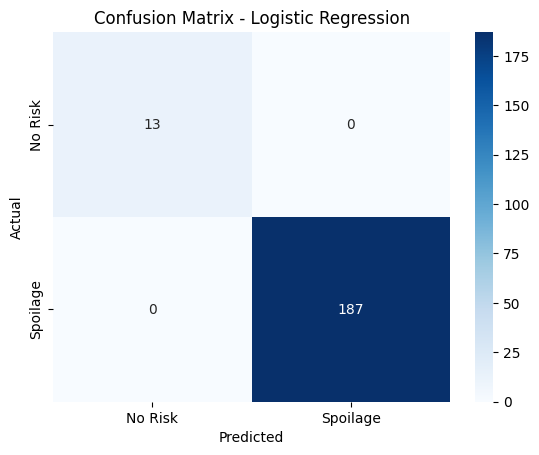

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  # ✅ Import here

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Spoilage"], yticklabels=["No Risk", "Spoilage"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

accuracy = (13 + 187) / (13 + 0 + 0 + 187) = 1.00 (100%)


This suggests the model is classifying spoilage risk perfectly.